# Descripción del juego

El juego es realmente un acertijo. Supongamos que tenemos un tablero como el siguiente:

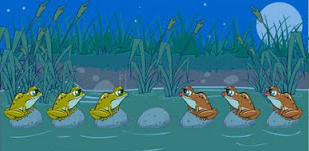


Un tablero con 7 huecos, en los que los 3 huecos de la izquierda contienen fichas verdes, mientras que los 3 huecos de la derecha contienen fichas marrones.

El objetivo del juego/acertijo, es conseguir que todas las fichas verdes ocupen las posiciones de las fichas marrones, y viceversa. Para alcanzar el objetivo las fichas verdes sólo pueden mover hacia la derecha mientras que las fichas marrones sólo pueden mover hacia la izquierda.

Los movimientos permitidos son los siguientes:

Se puede mover una ficha una única casilla hasta el hueco, que por supuesto deberá ser contiguo:
    
    



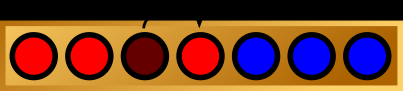

O se permite avanzar dos casillas con una ficha, saltando otra ficha del color contrario:

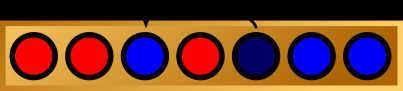

## Implementando el juego

### main

El juego consiste en una inicialización, en la que se creará el tablero, un bucle en el que el usuario va moviendo fichas hasta que no se puede mover nada más, y un final en el que se comprueba si el usuario ha ganado o ha perdido.

Esto es bien fácil de implementar si se consigue alcanzar un nivel suficiente de abstracción:


In [5]:
def main():
    # Creamos el tablero de juego
    tablero = init()
    objetivo = tablero[::-1]

    # Vamos pasando turnos hasta que no podamos continuar
    while puedes_mover_algo(tablero):
        # Pintamos el tablero
        show(tablero)
        # Pedimos por teclado una ficha para mover
        pos = int(input('Selecciona una ficha para mover (por su posición): '))
        # Nos aseguramos de que esa ficha puede mover
        if not puede_moverse(tablero, pos):
            print('The token cannot move!')
            continue
        # Y la movemos
        tablero = mover(tablero, pos)

    # Comprobamos si ha ganado
    if tablero == objetivo:
        print('FELICIDADES!')
    else:
        print('FRACASO!')

Visto de esta forma, el juego parece bien simple, ¿cierto?

Efectivamente, al ejecutar la celda no nos da ningún error a pesar de que aún no hemos creado las siguientes funciones:

    init()
    puedes_mover_algo(list)
    show(list)
    puede_moverse(list, int)
    mover(list, int)

Eso se debe a que al definir la función ésta no se ejecuta todavía.

Así pues debemos ir definiendo esas funciones. Podemos empezar por init(), que es la más sencilla.

### init()

La creación del tablero no es demasiado compleja. Tan sólo hay que crear una lista con 7 números enteros, en el que el 0 representa el hueco vacío, el 1 las fichas verdes, y el -1 las fichas marrones.


In [13]:
def init():
    return [1] * 3 + [0] + [-1] * 3

Como se puede observar, una función tremendamente simple, hasta tal punto que no requiere de ninguna otra función para trabajar. Por tanto, podemos recuperar la lista de funciones pendientes de main(), y continuar por la más sencilla, que probablemente es show()

### show(list)

Mostrar el tablero puede ser bastante complejo, pero en ésta ocasión nos limitaremos simplemente a pedirle a Python que nos pinte la lista, sin preocuparnos por el formato:


In [7]:
def show(tablero):
    print(tablero)

De las funciones que nos faltan, las dos pueden ser muy complejas si no nos esforzamos en abstraernos lo suficiente. Pero con un poquito de abstracción ambas se vuelven sumamente simples. Empezemos por puedes_mover_algo(list)

### puedes_mover_algo(list)

En realidad, ésta función sólo debe recorrer la lista, y preguntar si alguien puede moverse. En caso de encontrar alguna ficha que pueda moverse, devolveremos una respuesta afirmativa:


In [8]:
def puedes_mover_algo(tablero):
    for i in range(len(tablero)):
        if puede_moverse(tablero, i):
            return True
    return False

Conviene reparar en que ésta función hace uso de otra función puede_moverse(list, int), que todavía no hemos creado. Sin embargo, esa función ya la requeriamos en main(), así que realmente no añadimos más trabajo, tán sólo aprovechamos las ventajas de usar funciones.

Entre las funciones que aún tenemos pendientes, puede_moverse(list, int) y mover(list, int), claramente mover(list, int) debe ser nuestra siguiente candidata.

### mover(list, pos)

En un principio la función mover(list, int) puede parecer más compleja de lo que es, pero en realidad es una función muy sencilla si tenemos en cuenta que:

    • Ya hemos comprobado que la ficha se puede mover
    • Sólo existe una única posición a la que mover, pues sólo existe un hueco

Así que en realidad esta función sólo debe intercambiar los valores de la posición elegida y del hueco.


In [9]:
def mover(tablero, ficha):
    agujero = get_agujero(tablero)
    tablero[ficha], tablero[agujero] = tablero[agujero], tablero[ficha]
    return tablero

En ésta ocasión, hemos añadido una nueva función que debemos implementar, get_agujero(list), pero que es bien sencilla.

### get_agujero(list)

Ésta función tan sólo debe buscar donde se encuentra el 0 en la lista, que además sabemos que será único.


In [10]:
def get_agujero(tablero):
    for i,valor in enumerate(tablero):
        if not valor:
            return i

Finalmente, debemos enfrentarnos a la función más complicada, puede_moverse(list, int).

### puede_moverse(list, pos)

Ésta función puede volverse muy complicada, así que conviene tomarse un tiempo para pensar una estrategia. En nuestro caso vamos a intentar aprovechar el hecho de que sólo hay un hueco:


In [11]:
def puede_moverse(tablero, ficha):
    # Excluimos por supuesto fichas fuera del tablero
    if not -1 < ficha < len(tablero):
        return False
    # Y excluimos tambien el hueco
    if not tablero[ficha]:
        return False
    # Vamos a ver donde esta el hueco
    agujero = get_agujero(tablero)
    # Si el hueco es contiguo, y esta en el lado correcto, entonces sabemos positivamente que podemos mover
    if ficha + tablero[ficha] == agujero:
        return True
    # Si no es el caso, la ficha esta obligada a saltar
    if (ficha + 2 * tablero[ficha] == agujero) and (tablero[ficha + tablero[ficha]] != tablero[ficha]):
        return True
    # Si la ficha no puede avanzar o saltar, entonces no se puede mover
    return False



Ya tenemos el juego listo, así que es momento de jugar!

In [12]:
main()

[1, 1, 1, 0, -1, -1, -1]
Selecciona una ficha para mover (por su posición): 4
[1, 1, 1, -1, 0, -1, -1]
Selecciona una ficha para mover (por su posición): 2
[1, 1, 0, -1, 1, -1, -1]
Selecciona una ficha para mover (por su posición): 1
[1, 0, 1, -1, 1, -1, -1]
Selecciona una ficha para mover (por su posición): 3
[1, -1, 1, 0, 1, -1, -1]
Selecciona una ficha para mover (por su posición): 5
[1, -1, 1, -1, 1, 0, -1]
Selecciona una ficha para mover (por su posición): 6
[1, -1, 1, -1, 1, -1, 0]
Selecciona una ficha para mover (por su posición): 4
[1, -1, 1, -1, 0, -1, 1]
Selecciona una ficha para mover (por su posición): 2
[1, -1, 0, -1, 1, -1, 1]
Selecciona una ficha para mover (por su posición): 0
[0, -1, 1, -1, 1, -1, 1]
Selecciona una ficha para mover (por su posición): 1
[-1, 0, 1, -1, 1, -1, 1]
Selecciona una ficha para mover (por su posición): 3
[-1, -1, 1, 0, 1, -1, 1]
Selecciona una ficha para mover (por su posición): 5
[-1, -1, 1, -1, 1, 0, 1]
Selecciona una ficha para mover (por su